# Machine Learning for Email Spam Filter
Dataset:
Goal:
Attributes: 
    Email content
    Label(spam/ham)
Outline:

# Initial Setup

### Import Modules

In [1]:
import pandas as pd
import numpy as np
import string
import re

#import nltk
from nltk.corpus import stopwords
# Import Scikit-learn helper functions
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Import Scikit-learn models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Import Scikit-learn metric functions
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns



### Loading the dataset

In [2]:
df = pd.read_csv(r"fyp_dataset.csv",encoding='latin1')
#df.head()
df.shape

(60986, 2)

In [3]:
# check for null values
df.isnull().sum()

body     0
label    0
dtype: int64

spam    41306
ham     19680
Name: label, dtype: int64


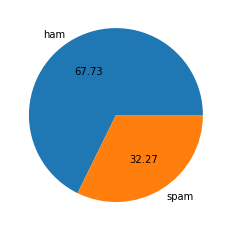

In [6]:
# Print counts of each label
print(df['label'].value_counts())
plt.pie(df['label'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

### Data Separate

In [10]:
#Split Data to train &　test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df['body'],df['label'],test_size=0.2, random_state=1)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)


(48788,) (12198,) (48788,) (12198,)


# Tokenization

In [4]:
def tokenizer(body):
    #Convert to lowercase 
    lower_body = body.lower() 
    #Remove punctuation
    nonpunc = ''.join(char for char in lower_body if char not in string.punctuation)
    #Remove extra spaces
    nonspace = re.sub(r'\s+', ' ', nonpunc)
    #Remove stopwords
    clean_body =  " ".join(word for word in nonspace.split() if word not in stopwords.words('english'))
    return clean_body

In [5]:
# clean the messages
df['clean_body'] = df['body'].apply(tokenizer)
df.head()

,body,label,clean_body
0,"Hey Billy, \n\nit was really fun going out the...",spam,hey billy really fun going night talking said ...
1,"\n\n\n\n\n\nsystem"" of the home. It will have...",spam,system home capabilities linked far know withi...
2,\n\n\n\n\n\nthe program and the creative abili...,spam,program creative abilities artist monitoring e...
3,\n\n\n\n\n\nGlad to see you!\nLook at the asso...,spam,glad see look assortment new online drug store...
4,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...,spam,hope others easy


# Building a Vectorizer

### Vectorize the Training Data

In [ ]:
# Vectorize the training inputs -- Takes about 35 mins to complete
#   There are two types of vectors: 

#     1. Count vectorizer
print("- Training Count Vectorizer -")
countVec = CountVectorizer(tokenizer=tokenizer)
train_count_x = countVec.fit_transform(x_train)

#     2. Term Frequency-Inverse Document Frequency (TF-IDF)corpus
print("- Training TF-IDF Vectorizer -")
tfidVec = TfidfVectorizer(tokenizer=tokenizer)
train_tfidf_x = tfidVec.fit_transform(x_train)

print("\n### Vectorizing Complete ###\n")

### Vectorize the Testing Data

In [ ]:
# Vectorize the testing inputs -- Takes about 15 mins to complete

print("- Count Vectorizer -")
test_count_x = countVec.transform(x_test)

print("- Tfidf Vectorizer -")
test_tfidf_x = tfidVec.transform(x_test)

print("\n### Vectorizing Complete ###\n")

# Test and Evaluate the Models

In [44]:
tfidf_X.toarray()[0]

array([0.36145677, 0.25514595, 0.19135947, 0.10631081, 0.06378649,
       0.31893244, 0.04252433, 0.06378649, 0.02126216, 0.29767028,
       0.02126216, 0.02126216, 0.21262163, 0.06378649, 0.3401946 ,
       0.14883514, 0.04252433, 0.02126216, 0.19135947, 0.42524326,
       0.31893244, 0.21262163, 0.02126216, 0.02126216])

In [45]:
tfidf_X.shape

(1, 24)

In [47]:
print(count_X,tfidf_X)

  (0, 5)	15
  (0, 1)	12
  (0, 19)	20
  (0, 20)	15
  (0, 0)	17
  (0, 9)	14
  (0, 14)	16
  (0, 6)	2
  (0, 15)	7
  (0, 12)	10
  (0, 23)	1
  (0, 8)	1
  (0, 11)	1
  (0, 21)	10
  (0, 16)	2
  (0, 18)	9
  (0, 7)	3
  (0, 22)	1
  (0, 13)	3
  (0, 2)	9
  (0, 3)	5
  (0, 4)	3
  (0, 17)	1
  (0, 10)	1   (0, 10)	0.021262162778128115
  (0, 17)	0.021262162778128115
  (0, 4)	0.06378648833438434
  (0, 3)	0.10631081389064058
  (0, 2)	0.19135946500315304
  (0, 13)	0.06378648833438434
  (0, 22)	0.021262162778128115
  (0, 7)	0.06378648833438434
  (0, 18)	0.19135946500315304
  (0, 16)	0.04252432555625623
  (0, 21)	0.21262162778128116
  (0, 11)	0.021262162778128115
  (0, 8)	0.021262162778128115
  (0, 23)	0.021262162778128115
  (0, 12)	0.21262162778128116
  (0, 15)	0.1488351394468968
  (0, 6)	0.04252432555625623
  (0, 14)	0.34019460445004984
  (0, 9)	0.2976702788937936
  (0, 0)	0.36145676722817793
  (0, 20)	0.3189324416719217
  (0, 19)	0.4252432555625623
  (0, 1)	0.25514595333753737
  (0, 5)	0.3189324416719217


In [ ]:



if __name__ == '__main__':
    df = pd.read_csv(r"trec07p1.csv",encoding='latin1')
    df.info()
    #Convert the body to a matrix of token counts trec07p1 (using function **process)
    #extract feature
    bow = CountVectorizer(analyzer=process).fit_transform(df['body'])
    print(bow.shape)

